### Levitation height calculation: interpolation

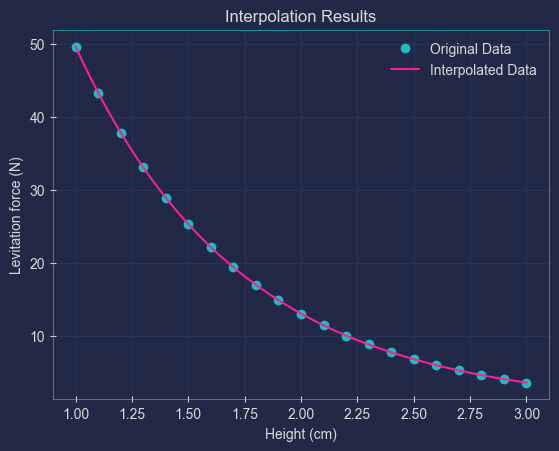

In [90]:
import numpy as np
from scipy.interpolate import interp1d
from scipy.optimize import fsolve, curve_fit
import matplotlib.pyplot as plt

# Matplolib style
plt.style.use('https://github.com/kaiuki2000/PitayaRemix/raw/main/PitayaRemix.mplstyle')

# Table with values from COMSOL
# values = [ # These were using the previous bulk geometry, which is different from the current one.
# (0.01000, 8.4877),
# (0.01100, 7.4442),
# (0.01200, 6.5336),
# (0.01300, 5.7355),
# (0.01400, 5.0370),
# (0.01500, 4.4246),
# (0.01600, 3.8875),
# (0.01700, 3.4159),
# (0.01800, 3.0021),
# (0.01900, 2.6394),
# (0.02000, 2.3220)
# ]

# Table with values from COMSOL
values = [
(0.010000, 24.810*2),
(0.011000, 21.664*2),
(0.012000, 18.927*2),
(0.013000, 16.546*2),
(0.014000, 14.470*2),
(0.015000, 12.662*2),
(0.016000, 11.084*2),
(0.017000, 9.7042*2),
(0.018000, 8.5010*2),
(0.019000, 7.4505*2),
(0.020000, 6.5329*2),
(0.021000, 5.7294*2),
(0.022000, 5.0284*2),
(0.023000, 4.4149*2),
(0.024000, 3.8780*2),
(0.025000, 3.4082*2),
(0.026000, 2.9961*2),
(0.027000, 2.6359*2),
(0.028000, 2.3201*2),
(0.029000, 2.0430*2),
(0.030000, 1.8006*2)
]

# Define the x and y values from the list "values"
x = np.array([tuple[0] for tuple in values])
y = np.array([tuple[1] for tuple in values])

# Create the interpolation function
interp_func = interp1d(x, y, kind = 'cubic')

# Generate new x values for interpolation
new_x = np.linspace(min(x), max(x), 100)

# Interpolate the y values for the new x values
new_y = interp_func(new_x)

# Plot the original and interpolated data
plt.plot(x*100, y, 'o', new_x*100, new_y, '-')
plt.xlabel('Height (cm)')
plt.ylabel('Levitation force (N)')
plt.title('Interpolation Results')
plt.legend(['Original Data', 'Interpolated Data'])
plt.show()

Here, I try two different methods to obtain the levitation height: using `fsolve` and using `interpolate.interp1d`. The latter is much faster, but the former is more accurate.

In [99]:
# Model parameters
mass   = (110 + 0 + 50 + 4*96)*1e-3 # [kg] # Car + Lid + Styrofoam + 4x Magnets
g      = 9.81     # [m/s^2]
weight = mass * g # [N]

# Lambda function for the interpolation function
f = lambda x: interp_func(x)

# Find the x value using fsolve
# Define the equation to solve
equation = lambda x: f(x) - weight

# Solve the equation using fsolve
x_value = fsolve(equation, x0 = 0.025)
print(f'Maglev car\'s levitation height:\nMethod 1 - fsolve:        {x_value[0]*100:.3f} cm.')

# Find the x value using the interpolation function
threshold = 0.1
indices   = np.argwhere(abs(new_y - weight) < threshold)
x_values  = new_x[indices]; x_value = x_values[0][0] if len(x_values) > 0 else None
print(f'Method 2 - Interpolation: {x_value*100:.3f} cm.')

Maglev car's levitation height:
Method 1 - fsolve:        2.690 cm.
Method 2 - Interpolation: 2.677 cm.


Fitting an exponential function to the data (for fun):

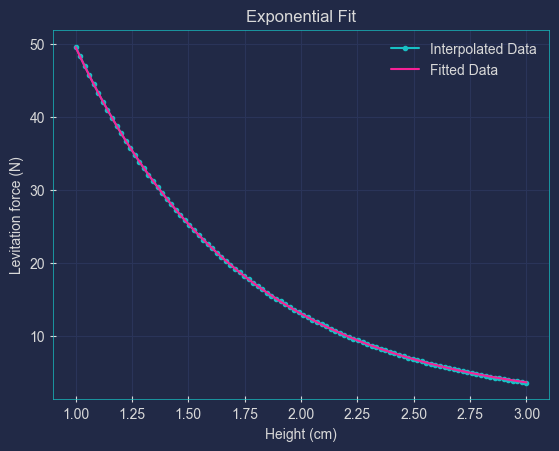

Optimized parameters:
a = 190.852 N;
b = -1.356 cm**(-1);
c = 0.371 N.


In [100]:
# Define the exponential function
def exponential_func(x, a, b, c):
    return a * np.exp(b * x) + c

# Fit the exponential function to the interpolated data
popt, pcov = curve_fit(exponential_func, new_x, new_y)

# Get the optimized parameters
a_opt, b_opt, c_opt = popt

# Generate new y values using the optimized parameters
fit_y = exponential_func(new_x, a_opt, b_opt, c_opt)

# Plot the original and fitted data
plt.plot(new_x*100, new_y, 'o', markersize=3, linestyle='-', label='Interpolated Data')
plt.plot(new_x*100, fit_y, markersize=3, linestyle='-', label='Fitted Data')
plt.xlabel('Height (cm)')
plt.ylabel('Levitation force (N)')
plt.title('Exponential Fit')
plt.legend()
plt.show()

# Print the optimized parameters
print(f'Optimized parameters:\na = {a_opt:.3f} N;\nb = {b_opt/100:.3f} cm**(-1);\nc = {c_opt:.3f} N.')

<font size="4" color="orange"> **Note that these values consider that we don't yet have a lid!** </font>
<br> As can be seen, the fit is pretty good! Just need to change the `mass` of the car, once I get a better approximation of its value. Either way, so far, the predicted levitation height is $h = 2.690$ $cm$ (distance from the track's magnets to the car's bulks). Distance from the track's magnets to the car would be $d \approx 1.690$ $cm$ (**if** the styrofoam layer is $0.5$ $cm$ thick) [I guess this is the actual *levitation height*]. Car thicnkess is $t = 3$ $mm$; Styorofoam thickness is $t_{s} = 5$ $mm$. So, levitation height is $h - (t + t_{s}) = 2.69 - (0.5 + 0.3) = 1.89$ $cm$.

In [103]:
# Decorator example
def my_decorator(func):
    def wrapper():
        print("Something is happening before the function is called.")
        func()
        print("Something is happening after the function is called.")
    return wrapper

@my_decorator
def say_whee():
    print("Whee!")

say_whee()

Something is happening before the function is called.
Whee!
Something is happening after the function is called.
